In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_hist(full_pop, sub_pop, title, save_name, gauss):
    fig, ax = plt.subplots(1, 2, sharey = True, layout = 'constrained')
    ax[0].hist(full_pop, bins = 91, density = True, fill = False, edgecolor = 'blue')
    ax[1].hist(sub_pop, bins = 91, density = True, fill = False, edgecolor = 'red')
    ax[0].set_xlabel('Edad')
    ax[1].set_xlabel('Edad')
    ax[0].set_ylabel('Probabilidad')
    if gauss:
        ax[0].set_title('Población')
        ax[1].set_title('Muestreo de {}'.format(title))
        plt.savefig(r'C:\Users\FLopezP\Documents\GitHub\PCIC\Detección de Anomalías\Imágenes\{}'.format(save_name))
    else:
        ax[0].set_title('Población (aleatoria)')
        ax[1].set_title('Muestreo de {} (aleatoria)'.format(title))
        plt.savefig(r'C:\Users\FLopezP\Documents\GitHub\PCIC\Detección de Anomalías\Imágenes\RAND_{}'.format(save_name))
    plt.show()

def compare(avg, min_val, max_val, save_name, gauss):
    fig, ax = plt.subplots(1, 3, sharey = True, layout = 'constrained')
    ax[0].hist(avg, bins = 91, density = True, fill = False, edgecolor = 'blue')
    ax[1].hist(min_val, bins = 91, density = True, fill = False, edgecolor = 'red')
    ax[2].hist(max_val, bins = 91, density = True, fill = False, edgecolor = 'green')
    ax[0].set_xlabel('Edad')
    ax[1].set_xlabel('Edad')
    ax[2].set_xlabel('Edad')
    ax[0].set_ylabel('Probabilidad')
    ax[0].set_title('Valor esperado')
    ax[1].set_title('Mínimo')
    ax[2].set_title('Máximo')
    if gauss:
        plt.savefig(r'C:\Users\FLopezP\Documents\GitHub\PCIC\Detección de Anomalías\Imágenes\{}'.format(save_name))
    else:
        plt.savefig(r'C:\Users\FLopezP\Documents\GitHub\PCIC\Detección de Anomalías\Imágenes\RAND_{}'.format(save_name))
    plt.show()
    
    
def get_hist(gauss):
    """
        Genera una población aleatoria de gente.
        gauss = Bool ;  Determina la estrategia para generar las edades aleatorias de las personas.
    """
    if gauss:
        mu, sigma = 45, 16
        # Muestra total
        pob = [int(_) for _ in list(np.random.normal(mu, sigma, 10000))]
        for i in range(len(pob)):
            if pob[i] < 0:
                pob[i] = random.randint(0,9)
            if pob[i] > 90:
                pob[i] = random.randint(80,90)
        
        intro = "Creación de población GAUSSIANA"
    else:
        # Muestra total
        pob = [random.randint(0, 90) for i in range(10000)] 
        intro = "Creación de población UNIFORME"

    # El submuestreo es independiente de la forma en la que se crea la población
    k_100 = [pob[random.randint(0, len(pob)-1)] for i in range(100)]
    k_1000 = [pob[random.randint(0, len(pob)-1)] for i in range(1000)]

    # Para las preguntas 2-3.
    lowest_age = []
    highest_age = []
    esperanza = []
    
    for i in range(200):
        random_sample = [pob[random.randint(0, len(pob)-1)] for i in range(100)]
        current_avg = int(sum(random_sample)/len(random_sample))
        
        lowest_age.append(min(random_sample))
        highest_age.append(max(random_sample))
        esperanza.append(current_avg)
    
    # Lo que sigue es solo graficar los resultados.
    print("=================================================================")
    print("========================== Pregunta 1 ===========================")
    print("=================================================================")
    print(intro)
    age_ds = pd.DataFrame(data = {'Edad': pob})
    val_count = age_ds['Edad'].value_counts()
    print('Estas son las 5 edades con más gente:')
    print(val_count.head())

    print("================= SUB MUESTREO DE 100 PERSONAS =================")
    plot_hist(pob, k_100, "100 personas", "Submuestreo 100.png", gauss)

    print("================= SUB MUESTREO DE 1000 PERSONAS =================")
    plot_hist(pob, k_1000, "1000 personas", "Submuestreo 1000.png", gauss)
    
    print("=================================================================")
    print("========================== Pregunta 2 ===========================")
    print("=================================================================")
    
    compare(esperanza, lowest_age, highest_age, "AvgMinMax.png", gauss)

========================== Pregunta 1 ===========================
Creación de población GAUSSIANA
Estas son las 5 edades con más gente:
45    271
46    262
51    261
38    261
48    257
Name: Edad, dtype: int64
================= SUB MUESTREO DE 100 PERSONAS =================


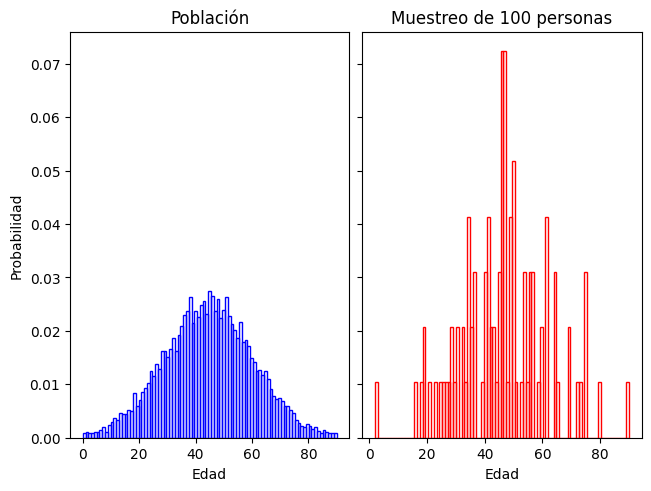

================= SUB MUESTREO DE 1000 PERSONAS =================


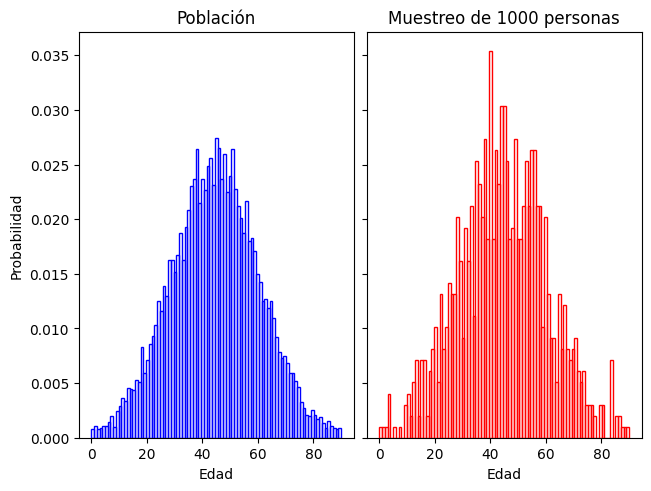

========================== Pregunta 2 ===========================


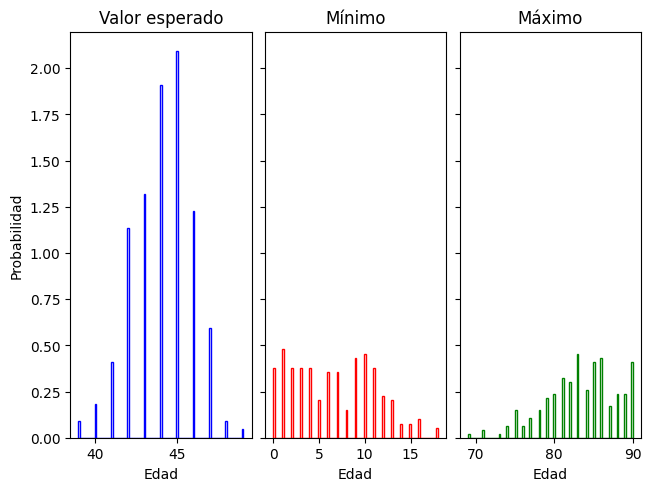

In [3]:
get_hist(True)

========================== Pregunta 1 ===========================
Creación de población UNIFORME
Estas son las 5 edades con más gente:
16    136
62    135
66    133
38    131
34    130
Name: Edad, dtype: int64
================= SUB MUESTREO DE 100 PERSONAS =================


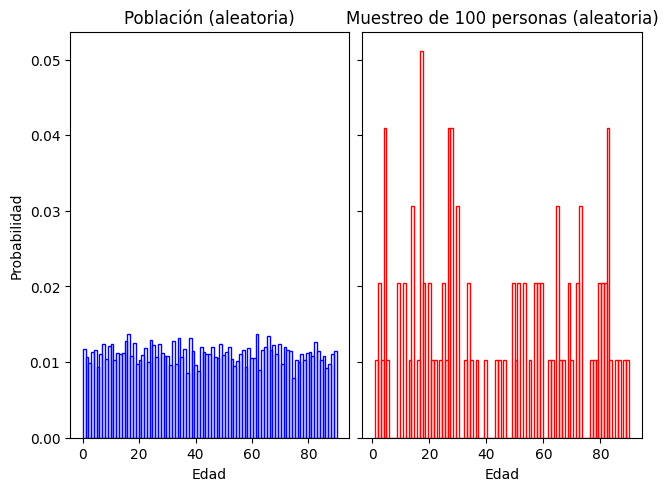

================= SUB MUESTREO DE 1000 PERSONAS =================


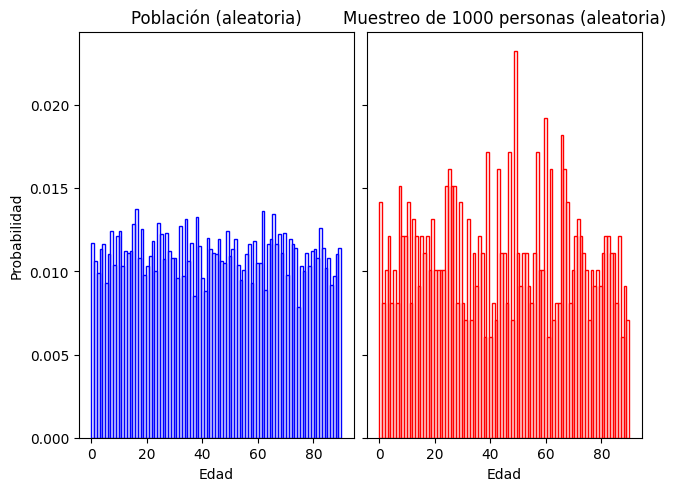

========================== Pregunta 2 ===========================


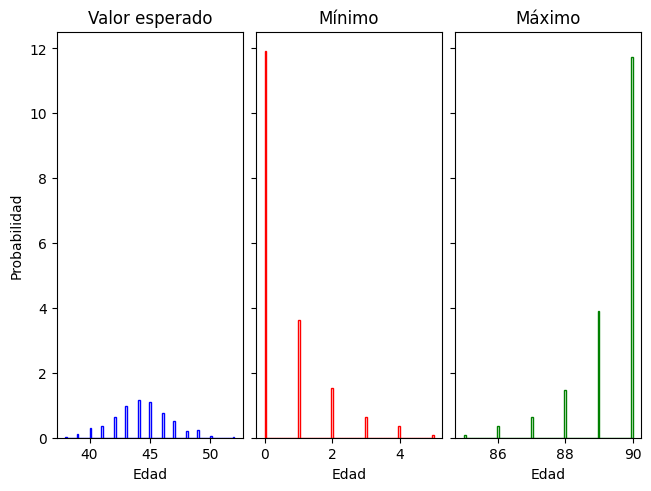

In [4]:
get_hist(False)